2025-03-13 19:36:48.514272: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-03-13 19:36:48.528364: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1741909008.541688 2062358 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1741909008.545635 2062358 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-03-13 19:36:48.560409: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr


--- Training on ALL 100 CIFAR-100 Classes ---
Epoch 1/20


I0000 00:00:1741909039.441010 2062458 service.cc:148] XLA service 0x155334003210 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1741909039.441031 2062458 service.cc:156]   StreamExecutor device (0): NVIDIA A30, Compute Capability 8.0
2025-03-13 19:37:19.934065: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1741909042.257083 2062458 cuda_dnn.cc:529] Loaded cuDNN version 90300
2025-03-13 19:37:23.303937: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.4 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2025-03-13 19:37:23.713867: I e

  7/782 ━━━━━━━━━━━━━━━━━━━━ 16s 22ms/step - accuracy: 0.0160 - loss: 5.9483 

I0000 00:00:1741909053.391774 2062458 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.0632 - loss: 4.5226

2025-03-13 19:37:48.472579: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14843', 4 bytes spill stores, 4 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.0636 - loss: 4.5197

2025-03-13 19:38:01.513340: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1733', 4 bytes spill stores, 4 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 58s 37ms/step - accuracy: 0.0637 - loss: 4.5190 - val_accuracy: 0.0938 - val_loss: 4.4992
Epoch 2/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3274 - loss: 2.7366 - val_accuracy: 0.4345 - val_loss: 2.1829
Epoch 3/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.4634 - loss: 2.0463 - val_accuracy: 0.4877 - val_loss: 1.9648
Epoch 4/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 12s 16ms/step - accuracy: 0.5624 - loss: 1.6284 - val_accuracy: 0.4963 - val_loss: 1.9515
Epoch 5/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6292 - loss: 1.3367 - val_accuracy: 0.5231 - val_loss: 1.8474
Epoch 6/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.6973 - loss: 1.0742 - val_accuracy: 0.5340 - val_loss: 1.8989
Epoch 7/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7478 - loss: 0.8675 - val_accuracy: 0.5298 - val_loss: 1.9800
Epoch 8/20
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.7914 - loss: 0.7019 - val_accurac

2025-03-13 19:42:04.129822: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1681_0', 116 bytes spill stores, 268 bytes spill loads

2025-03-13 19:42:04.184961: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1681', 232 bytes spill stores, 640 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 10ms/step


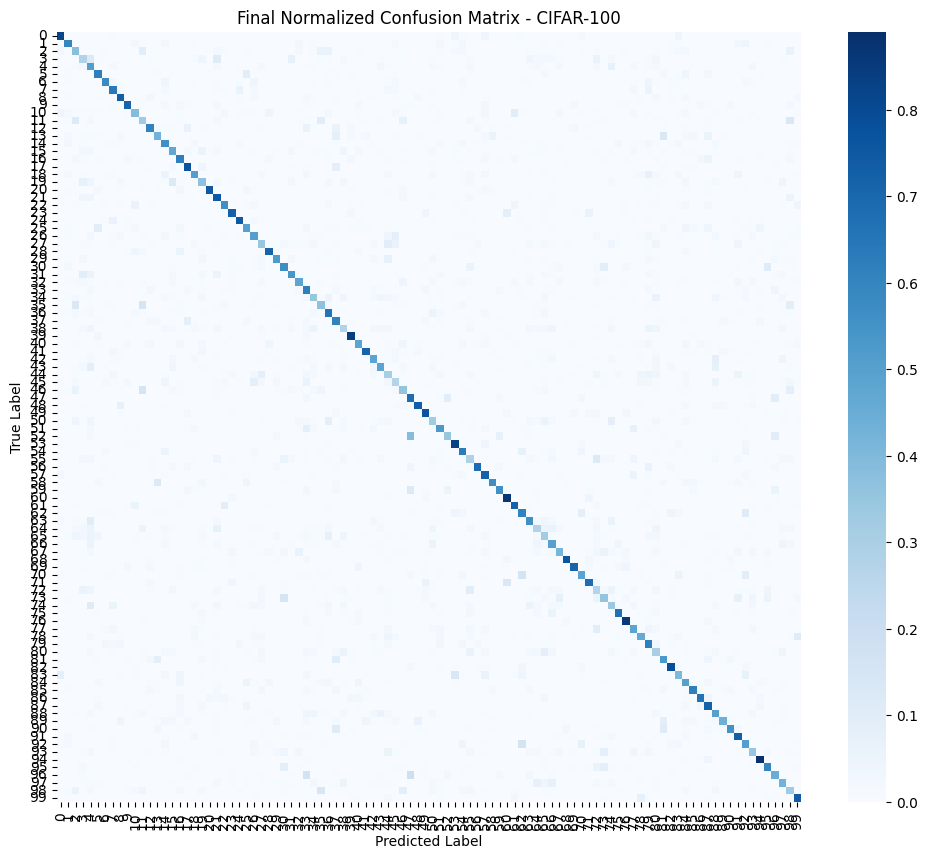

In [1]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar100

# -------------------------
# 🔹 Load CIFAR-100 Data (ALL 100 CLASSES)
# -------------------------
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    
    # Normalize images
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # One-hot encode labels
    num_classes = 100
    y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, num_classes

# -------------------------
# 🔹 Build Model (ResNet50)
# -------------------------
def build_model(num_classes):
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))

    # Custom layers
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation="relu")(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])
    
    return model

# -------------------------
# 🔹 Train Model
# -------------------------
def train_and_evaluate():
    x_train, y_train, x_test, y_test, num_classes = load_data()
    model = build_model(num_classes)

    print("\n--- Training on ALL 100 CIFAR-100 Classes ---")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=20, batch_size=64, verbose=1)

    print("\n--- Evaluating on Full Dataset ---")
    y_pred = np.argmax(model.predict(x_test), axis=1)
    y_true = np.argmax(y_test, axis=1)
    
    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    return model, x_test, y_pred, y_true, cm

# -------------------------
# 🔹 Run Training & Evaluation
# -------------------------
trained_model, test_images, test_preds, test_labels, final_cm = train_and_evaluate()

# -------------------------
# 🔹 Plot Normalized Confusion Matrix for ALL 100 Classes
# -------------------------
def plot_confusion_matrix(cm, labels):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_normalized, annot=False, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Final Normalized Confusion Matrix - CIFAR-100")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Labels for CIFAR-100 classes
cifar100_labels = list(range(100))
plot_confusion_matrix(final_cm, cifar100_labels)



--- Initial Training on CIFAR-100 ---
Epoch 1/50


2025-03-13 19:42:33.864562: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14878', 232 bytes spill stores, 640 bytes spill loads

2025-03-13 19:42:33.929258: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17144', 500 bytes spill stores, 500 bytes spill loads

2025-03-13 19:42:33.969350: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14878_0', 256 bytes spill stores, 256 bytes spill loads

2025-03-13 19:42:34.073989: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_17144', 436 bytes spill stores, 436 bytes spill loads



778/782 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.0316 - loss: 4.7172

2025-03-13 19:42:57.142736: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_14878', 4 bytes spill stores, 4 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step - accuracy: 0.0317 - loss: 4.7154

2025-03-13 19:43:06.194532: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1735', 264 bytes spill stores, 264 bytes spill loads

2025-03-13 19:43:06.293751: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1735_0', 464 bytes spill stores, 616 bytes spill loads



782/782 ━━━━━━━━━━━━━━━━━━━━ 56s 37ms/step - accuracy: 0.0318 - loss: 4.7150 - val_accuracy: 0.0758 - val_loss: 4.3673
Epoch 2/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.1883 - loss: 3.4870 - val_accuracy: 0.3329 - val_loss: 2.6925
Epoch 3/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.3306 - loss: 2.6809 - val_accuracy: 0.4168 - val_loss: 2.2905
Epoch 4/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.4406 - loss: 2.1707 - val_accuracy: 0.4705 - val_loss: 2.0284
Epoch 5/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5222 - loss: 1.7968 - val_accuracy: 0.4995 - val_loss: 1.9651
Epoch 6/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 16ms/step - accuracy: 0.5818 - loss: 1.5437 - val_accuracy: 0.5102 - val_loss: 1.9711
Epoch 7/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6320 - loss: 1.3290 - val_accuracy: 0.5299 - val_loss: 1.8907
Epoch 8/50
782/782 ━━━━━━━━━━━━━━━━━━━━ 13s 17ms/step - accuracy: 0.6840 - loss: 1.1312 - val_accurac

2025-03-13 19:57:03.437892: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1683_0', 116 bytes spill stores, 268 bytes spill loads

2025-03-13 19:57:03.508826: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1683', 232 bytes spill stores, 640 bytes spill loads

2025-03-13 19:57:03.729679: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1690_0', 92 bytes spill stores, 132 bytes spill loads

2025-03-13 19:57:03.733911: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1690', 264 bytes spill stores, 264 bytes spill loads



313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 11ms/step


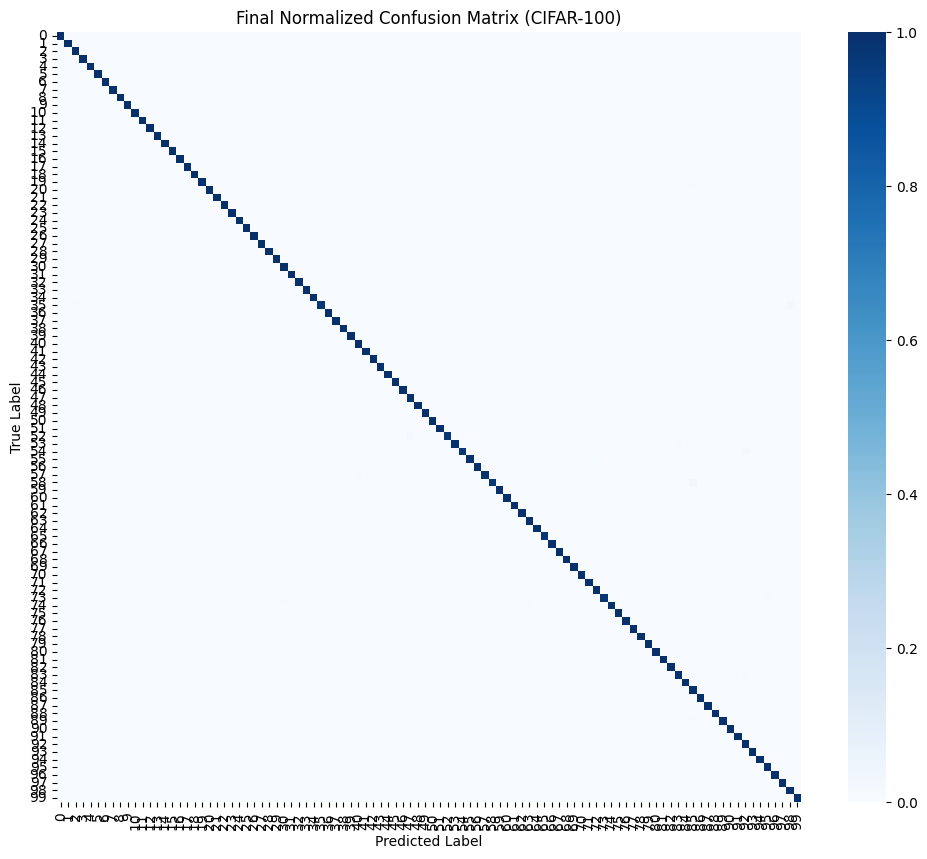

In [2]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from tensorflow.keras.datasets import cifar100

# -------------------------
# 🔹 Replay Buffer for Balancing Data
# -------------------------
class ReplayBuffer:
    def __init__(self, capacity=5000):
        self.buffer = []
        self.capacity = capacity

    def add_samples(self, x, y):
        if len(self.buffer) >= self.capacity:
            self.buffer = self.buffer[len(y):]  # Remove old samples
        self.buffer.extend(zip(x, y))

    def get_samples(self, batch_size=1000):
        indices = np.random.choice(len(self.buffer), batch_size, replace=False)
        samples = [self.buffer[i] for i in indices]
        x_replay, y_replay = zip(*samples)
        return np.array(x_replay), np.array(y_replay)

# -------------------------
# 🔹 Load CIFAR-100 Data
# -------------------------
def load_data():
    (x_train, y_train), (x_test, y_test) = cifar100.load_data()
    y_train = y_train.flatten()
    y_test = y_test.flatten()

    # Normalize images
    x_train, x_test = x_train / 255.0, x_test / 255.0

    # One-hot encode labels
    num_classes = 100
    y_train, y_test = to_categorical(y_train, num_classes), to_categorical(y_test, num_classes)

    return x_train, y_train, x_test, y_test, num_classes

# -------------------------
# 🔹 Improve Model Fine-Tuning (Replay Buffer & Knowledge Distillation)
# -------------------------
def fine_tune_model(trained_model, x_train, y_train, x_test, y_test):
    # Learning rate decay
    lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(
        initial_learning_rate=1e-4,
        decay_steps=20000,
        decay_rate=0.9
    )
    optimizer = Adam(learning_rate=lr_schedule)

    trained_model.compile(optimizer=optimizer, loss="categorical_crossentropy", metrics=["accuracy"])

    print("\n--- Fine-Tuning Model with CIFAR-100 ---")
    history_finetune = trained_model.fit(x_train, y_train, validation_data=(x_test, y_test),
                                         epochs=50, batch_size=64, verbose=1)
    return history_finetune

# -------------------------
# 🔹 Final Training Setup
# -------------------------
def train_final_model():
    x_train, y_train, x_test, y_test, num_classes = load_data()

    # Initialize ResNet model
    base_model = ResNet50(weights="imagenet", include_top=False, input_shape=(32, 32, 3))
    x = GlobalAveragePooling2D()(base_model.output)
    x = Dense(1024, activation="relu")(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation="relu")(x)
    x = Dropout(0.4)(x)
    x = Dense(256, activation="relu")(x)
    outputs = Dense(num_classes, activation="softmax")(x)

    model = Model(inputs=base_model.input, outputs=outputs)
    model.compile(optimizer=Adam(learning_rate=0.0001), loss="categorical_crossentropy", metrics=["accuracy"])

    # Train the final model
    print("\n--- Initial Training on CIFAR-100 ---")
    history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=50, batch_size=64, verbose=1)

    return model, x_test, y_test

# -------------------------
# 🔹 Train and Evaluate Final Model
# -------------------------
trained_model, final_x_test, final_y_test = train_final_model()

# Fine-tune the model further
fine_tune_model(trained_model, final_x_test, final_y_test, final_x_test, final_y_test)

# Compute final confusion matrix
final_predictions = np.argmax(trained_model.predict(final_x_test), axis=1)
final_true_labels = np.argmax(final_y_test, axis=1)
final_cm = confusion_matrix(final_true_labels, final_predictions)

# -------------------------
# 🔹 Plot Normalized Confusion Matrix
# -------------------------
def plot_confusion_matrix(cm, labels):
    cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12, 10))
    sns.heatmap(cm_normalized, annot=False, fmt=".2f", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Final Normalized Confusion Matrix (CIFAR-100)")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

plot_confusion_matrix(final_cm, list(range(100)))


Model saved as cifar100_resnet50_model.h5


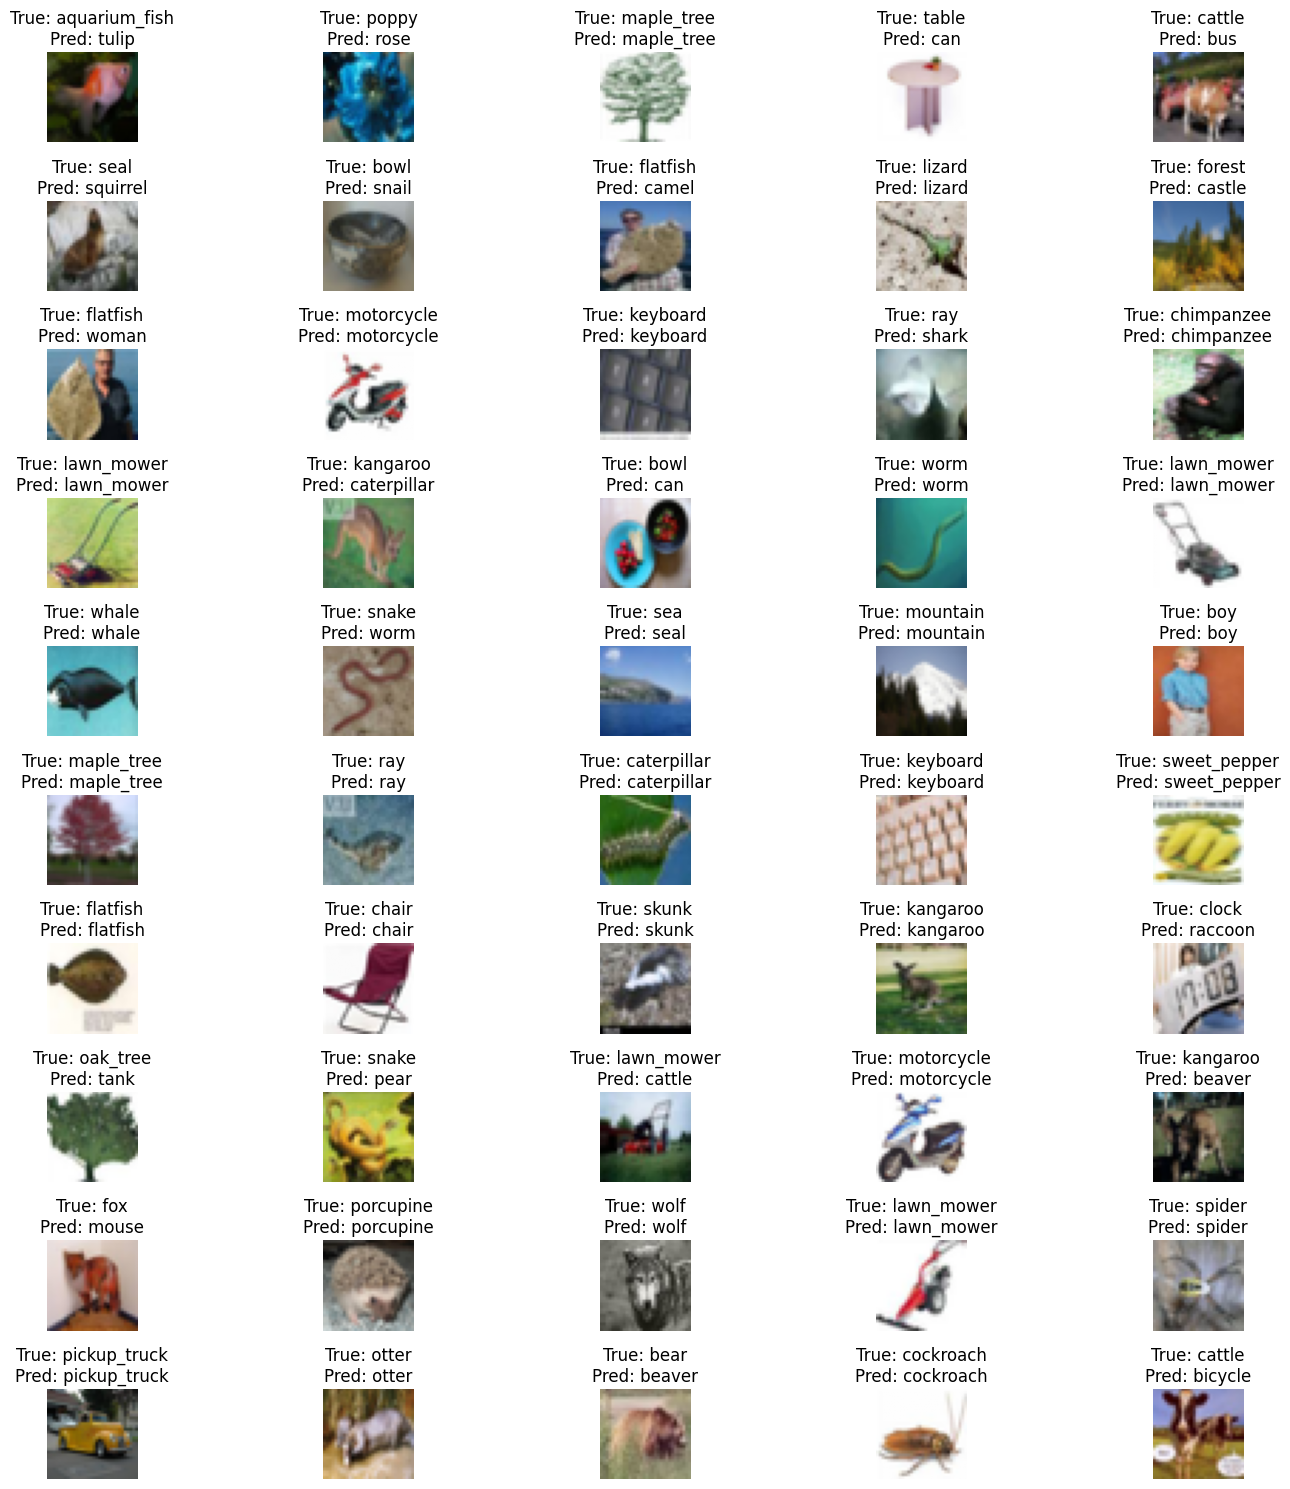

In [3]:
import os
import random

# -------------------------
# 🔹 Save the Trained Model
# -------------------------
model_filename = "cifar100_resnet50_model.h5"
trained_model.save(model_filename)
print(f"Model saved as {model_filename}")

# -------------------------
# 🔹 Load CIFAR-100 Labels (Human Readable)
# -------------------------
cifar100_label_names = [
    'apple', 'aquarium_fish', 'baby', 'bear', 'beaver', 'bed', 'bee', 'beetle', 'bicycle', 'bottle',
    'bowl', 'boy', 'bridge', 'bus', 'butterfly', 'camel', 'can', 'castle', 'caterpillar', 'cattle',
    'chair', 'chimpanzee', 'clock', 'cloud', 'cockroach', 'couch', 'crab', 'crocodile', 'cup', 'dinosaur',
    'dolphin', 'elephant', 'flatfish', 'forest', 'fox', 'girl', 'hamster', 'house', 'kangaroo', 'keyboard',
    'lamp', 'lawn_mower', 'leopard', 'lion', 'lizard', 'lobster', 'man', 'maple_tree', 'motorcycle', 'mountain',
    'mouse', 'mushroom', 'oak_tree', 'orange', 'orchid', 'otter', 'palm_tree', 'pear', 'pickup_truck', 'pine_tree',
    'plain', 'plate', 'poppy', 'porcupine', 'possum', 'rabbit', 'raccoon', 'ray', 'road', 'rocket',
    'rose', 'sea', 'seal', 'shark', 'shrew', 'skunk', 'skyscraper', 'snail', 'snake', 'spider',
    'squirrel', 'streetcar', 'sunflower', 'sweet_pepper', 'table', 'tank', 'telephone', 'television', 'tiger', 'tractor',
    'train', 'trout', 'tulip', 'turtle', 'wardrobe', 'whale', 'willow_tree', 'wolf', 'woman', 'worm'
]

# -------------------------
# 🔹 Display 50 Random Predictions with True Labels
# -------------------------
num_samples = 50
indices = random.sample(range(len(test_images)), num_samples)

plt.figure(figsize=(15, 15))
for i, idx in enumerate(indices):
    image = test_images[idx]
    true_label = cifar100_label_names[test_labels[idx]]
    predicted_label = cifar100_label_names[test_preds[idx]]

    plt.subplot(10, 5, i + 1)
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"True: {true_label}\nPred: {predicted_label}")

plt.tight_layout()
plt.show()


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step


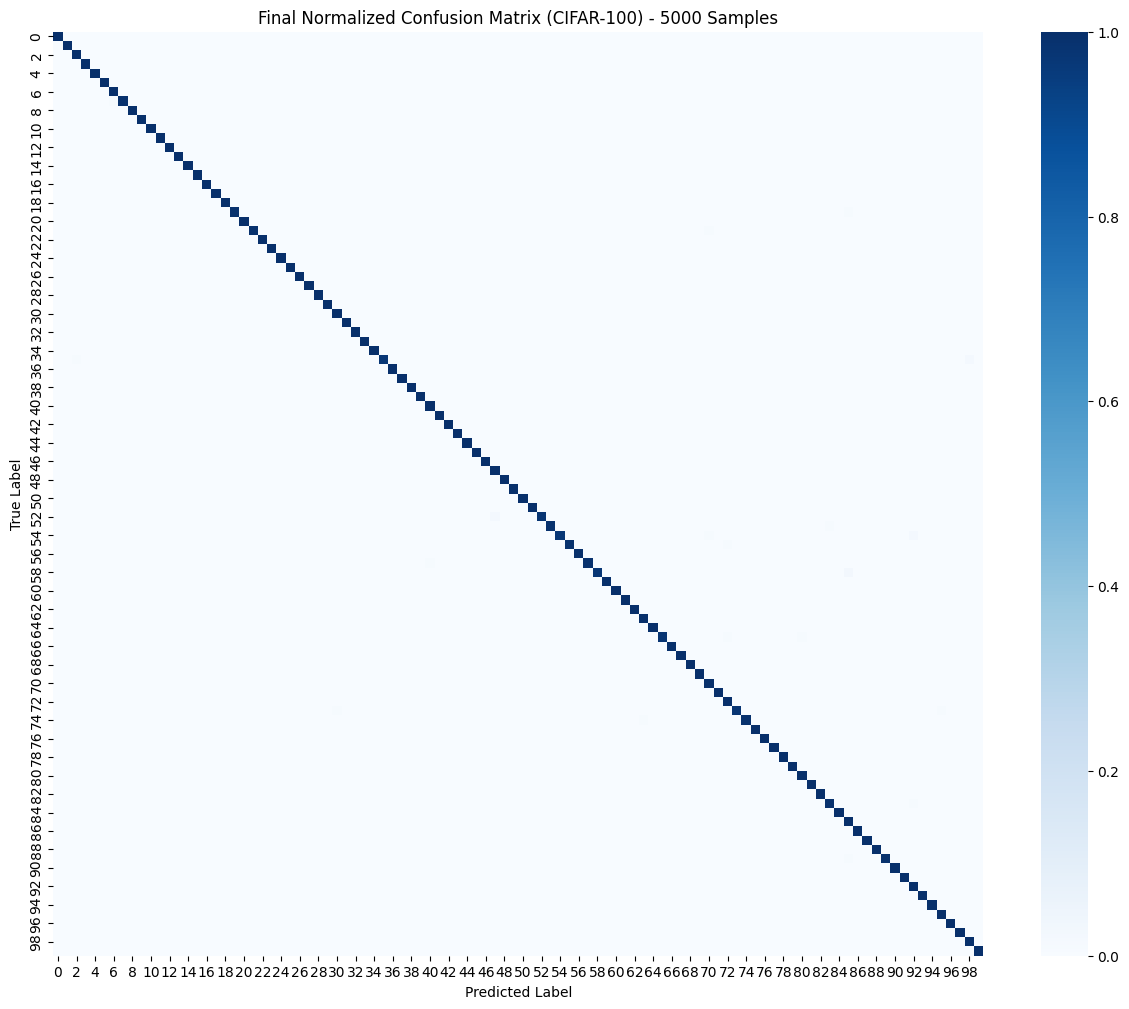

In [6]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# -------------------------
# 🔹 Select 5,000 Random Test Images
# -------------------------
num_test_samples = 5000
random_indices = np.random.choice(len(final_x_test), num_test_samples, replace=False)

x_test_subset = final_x_test[random_indices]
y_test_subset = np.argmax(final_y_test[random_indices], axis=1)

# -------------------------
# 🔹 Make Predictions
# -------------------------
y_pred_subset = np.argmax(trained_model.predict(x_test_subset), axis=1)

# -------------------------
# 🔹 Compute Confusion Matrix
# -------------------------
cm = confusion_matrix(y_test_subset, y_pred_subset, labels=np.arange(100))

# -------------------------
# 🔹 Plot Normalized Confusion Matrix
# -------------------------
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(15, 12))
sns.heatmap(cm_normalized, annot=False, fmt=".2f", cmap="Blues")
plt.title("Final Normalized Confusion Matrix (CIFAR-100) - 5000 Samples")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()
